In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import holoviews as hv
import numpy as np
import seaborn
hv.notebook_extension()
%matplotlib inline

interval = 10
interval_size = 0.01

mpl.rcParams.update({'font.size':14})
mpl.rcParams['xtick.major.pad']='8'
mpl.rcParams['ytick.major.pad']='8'
mpl.rcParams['lines.linewidth'] = 4
plt.rc('text', usetex=True)

In [3]:
def gaussian(x,mu,sigma):
    y = np.exp(-(x-mu)**2/(2*sigma**2))/(2*pi*sigma**2)**(1.0/2)
    return y


def pdf_multivariate_gauss(x, mu, cov):
    '''
    Caculate the multivariate normal density (pdf)

    Keyword arguments:
        x = numpy array of a "d x 1" sample vector
        mu = numpy array of a "d x 1" mean vector
        cov = "numpy array of a d x d" covariance matrix
    '''
    assert(mu.shape[0] > mu.shape[1]), 'mu must be a row vector'
    assert(x.shape[0] > x.shape[1]), 'x must be a row vector'
    assert(cov.shape[0] == cov.shape[1]), 'covariance matrix must be square'
    assert(mu.shape[0] == cov.shape[0]), 'cov_mat and mu_vec must have the same dimensions'
    assert(mu.shape[0] == x.shape[0]), 'mu and x must have the same dimensions'
    part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)) )
    part2 = (-1/2) * ((x-mu).T.dot(np.linalg.inv(cov))).dot((x-mu))
    return float(part1 * np.exp(part2))

def two_dimen_gaussian(mu,cov,x = np.arange(-7, 7, 0.1),y = np.arange(-7, 7, 0.1), samples=False):
    fig_size = 5
    #plt.figure(figsize=[fig_size+1.5, fig_size])
    plt.figure(figsize=[fig_size, fig_size])
    xx, yy = np.meshgrid(x, y, sparse=True)
    z = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            z[i,j] = pdf_multivariate_gauss(np.array([[xx[0][i]], [yy[j][0]]]), mu, cov)
    plt.contourf(x,y,z,cmap=cm.gray)
    x, y = np.random.multivariate_normal([mu[0][0],mu[1][0]], cov, 100).T
    #plt.colorbar(shrink=0.8, pad = 0.05)
    plt.ylabel('X2')
    plt.xlabel('X1')
    if samples:
        plt.plot(x, y, 'x')
        plt.axis('equal')
        plt.xlim([-4,4])
        plt.ylim([-4,4])
    

0.0 5.0
0.0 3.0
0.0 1.0
-2.0 1.0


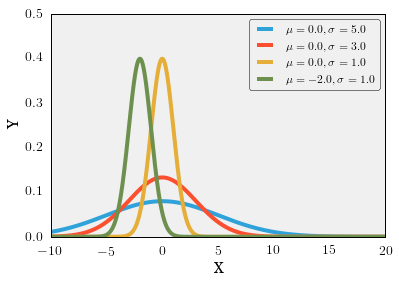

In [3]:
x = np.arange(-interval, interval+10, interval_size)
mu=[0.0,0.0,0.0,-2.0]
sigma=[5.0,3.0,1.0,1.0]

plt.xlim([-10,20])
plt.ylim([0,0.5])

for i in np.arange(0,len(mu),1):
    name = 'g'+str(i) + ','
    print (mu[i],sigma[i])
    exec(name + " = plt.plot(x,gaussian(x," + str(mu[i]) + "," + str(sigma[i]) + "), label='$\mu=" + str(mu[i]) + ",\sigma=" + str(sigma[i]) + "$')")
plt.legend(handles=[g0,g1,g2,g3])
plt.ylabel('Y')
plt.xlabel('X')
plt.savefig('../FinalReport/Pictures/Introduction/gaussian.png', dpi=200,bbox_inches='tight')

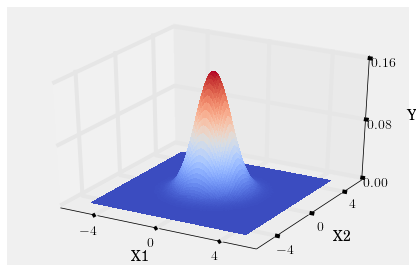

In [8]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.zeros((100,100))
mu=np.array([[0],[0]])
cov=np.eye(2)

for i in range(100):
        for j in range(100):
            z[i,j] = pdf_multivariate_gauss(np.array([[xx[0][i]], [yy[j][0]]]), mu, cov)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


mpl.rcParams['xtick.major.pad']='0'
mpl.rcParams['ytick.major.pad']='0'
ax.set_xticks([-4,0,4])
ax.set_yticks([-4,0,4])
ax.set_zticks([0,0.08,0.16])
#fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.tight_layout()
plt.savefig('../FinalReport/Pictures/Introduction/2dgaussian.png', dpi=200,bbox_inches='tight')
plt.show()

In [5]:
mu[1][0]

0

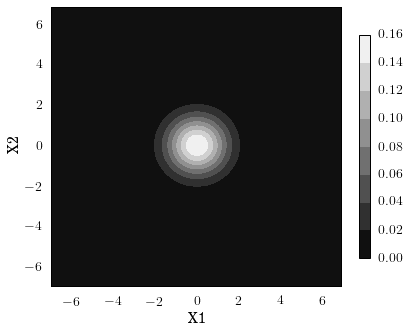

In [63]:
mu=np.array([[0],[0]])
cov=np.eye(2)
two_dimen_gaussian(mu,cov)
plt.savefig('../FinalReport/Pictures/Introduction/2dgaussian_alternative.png', dpi=200,bbox_inches='tight')

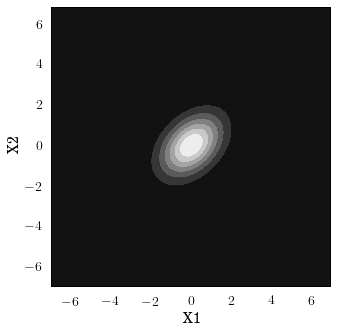

In [76]:
mu=np.array([[0],[0]])
cov=np.array([[1   , 0.4],
              [0.4 , 1  ]])
two_dimen_gaussian(mu,cov)
plt.savefig('../FinalReport/Pictures/Introduction/2dgaussian_0.4_0.4.png', dpi=200,bbox_inches='tight')

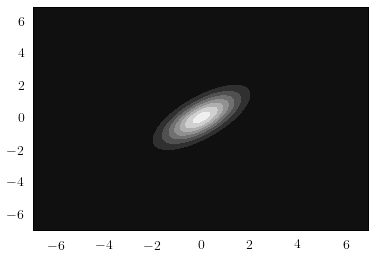

In [8]:
mu=np.array([[0],[0]])
cov=np.array([[1   , 0.7],
              [0.7 , 1  ]])
two_dimen_gaussian(mu,cov)

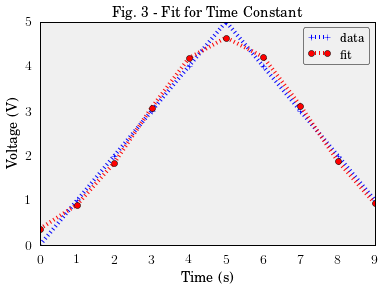

In [9]:
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

x = ar(range(10))
y = ar([0,1,2,3,4,5,4,3,2,1])

n = len(x)                          #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

def gaussian(x,a,mu,sigma):
    y = a*np.exp(-(x-mu)**2/(2*sigma**2))
    return y

popt,pcov = curve_fit(gaussian,x,y)

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.title('Fig. 3 - Fit for Time Constant')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()

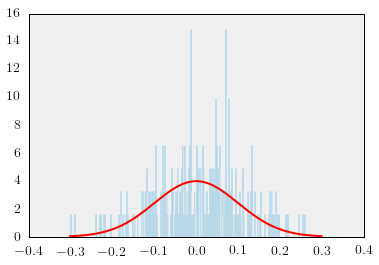

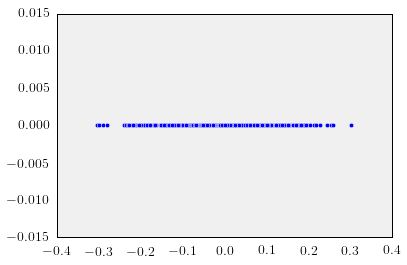

In [77]:
samples = 500
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, samples)
count, bins, ignored = plt.hist(s, samples, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
              np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')
plt.show()

x = s
y = np.zeros((samples,1))

plt.scatter(x,y)

plt.show()

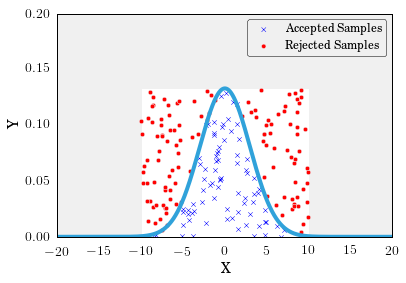

In [152]:
ax1 = plt.gca()

ax1.add_patch(
    patches.Rectangle(
        (-10, 0),   # (x,y)
        20,          # width
        0.133,          # height
        facecolor="#ffffff",
        linewidth=1
    )
)

samples=200
interval = 20
mu=0
sigma=3
x = np.arange(-interval, interval, interval_size)
y = gaussian(x,mu,sigma)

xs = np.random.uniform(-10,10,samples)
ys = np.random.uniform(0,y[int(y.shape[0]/2)],samples)


plt.xlim([-interval,interval])
plt.ylim([0,0.2])

g = plt.plot(x,y, label='$\mu=' + str(mu) + ',\sigma^2=' + str(sigma) + '$')
for i in range(samples):
    if (ys[i]<gaussian(xs[i],mu,sigma)):
        a = plt.scatter(xs[i],ys[i],marker='x',c='b',zorder=2, label='Accepted samples')
    else:
        r = plt.scatter(xs[i],ys[i],marker='o',zorder=2,c='r', label='Rejected samples')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend((a,r),
           ('Accepted Samples', 'Rejected Samples'),
           scatterpoints=1,
           loc='upper right')
plt.savefig('../FinalReport/Pictures/Introduction/1dgsamples.png', dpi=200,bbox_inches='tight')


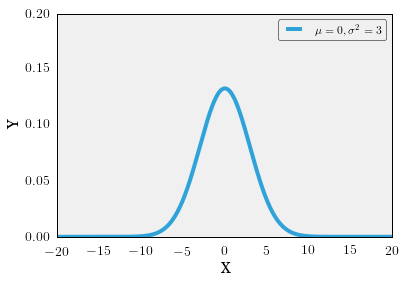

In [153]:
interval = 20
x = np.arange(-interval, interval, interval_size)
y = gaussian(x,mu,sigma)
plt.xlim([-interval,interval])
plt.ylim([0,0.2])
g = plt.plot(x,y, label='$\mu=' + str(mu) + ',\sigma^2=' + str(sigma) + '$')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(handles=g)
plt.savefig('../FinalReport/Pictures/Introduction/1dgaussian.png', dpi=200,bbox_inches='tight')

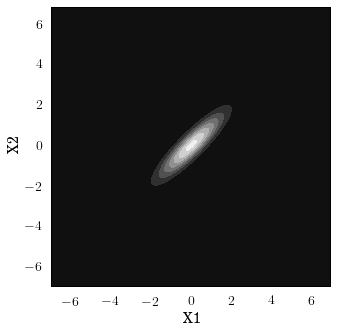

In [160]:
mu=np.array([[0],[0]])
cov=np.array([[1   , 0.9],
              [0.9 , 1  ]])
two_dimen_gaussian(mu,cov)

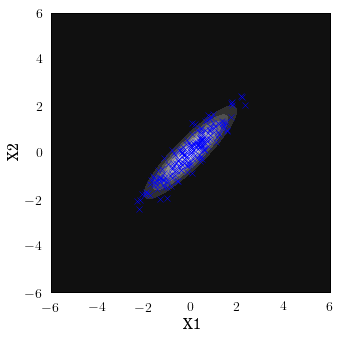

In [163]:
mu=np.array([[0],[0]])
cov=np.array([[1   , 0.9],
              [0.9 , 1  ]])
two_dimen_gaussian(mu,cov)
mu = [0,0]
fig_size = 5
#plt.figure(figsize=[fig_size, fig_size])

x, y = np.random.multivariate_normal(mu, cov, 200).T
plt.plot(x, y, 'x',c='b')
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.ylabel('X2')
plt.xlabel('X1')
plt.savefig('../FinalReport/Pictures/Introduction/2dgaussian_samples.png', dpi=200,bbox_inches='tight')

$h(x)=ax+b \\ J=\frac{1}{2}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})^2 \\ $ 


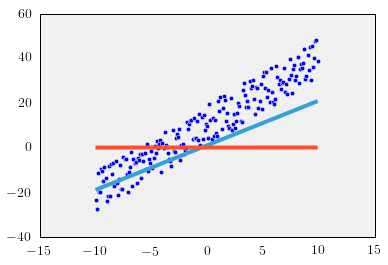

In [13]:
np.random.uniform(0,1)
x = np.arange(-10,10,0.1)
noise = 3*np.random.uniform(-1,1,len(x))
y = 3*(x+noise)+10
a = 0.001
b = 0.001
h = a*x+b
plt.scatter(x,y)
plt.plot(x,2*x+1)
plt.plot(x,h)

In [14]:
lr = 0.00001
a_s = np.zeros((100,1))
b_s = np.zeros((100,1))
x_s = np.arange(1,100,1)
for i in range(100):
    a_s[i] = a
    b_s[i] = b
    der_a = a*x*x + x*b - x*y
    der_b = a*x + b - y
    a = a - lr*np.sum(der_a)
    b = b - lr*np.sum(der_b)


b':HoloMap   [Iteration]\n   :Overlay\n      .Curve.I    :Curve   [x]   (y)\n      .Scatter.I  :Scatter   [x]   (y)\n      .Scatter.II :Scatter   [x]   (y)'
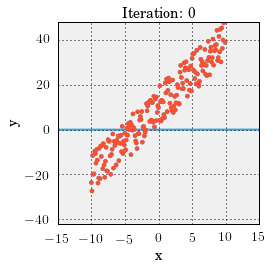
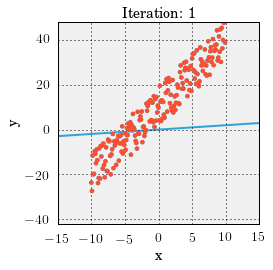
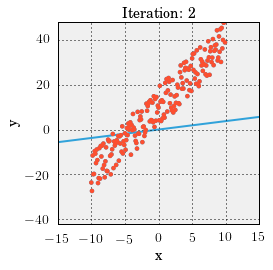
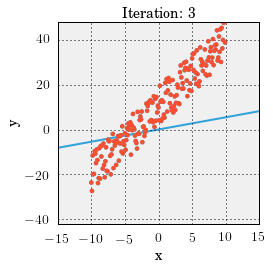
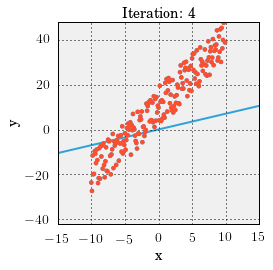
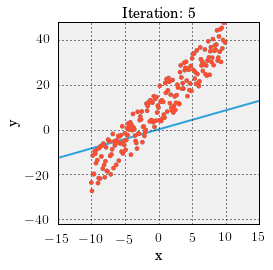
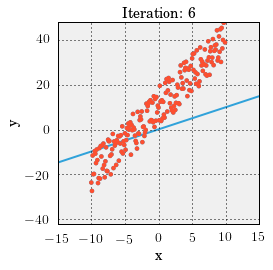
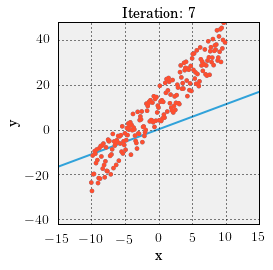
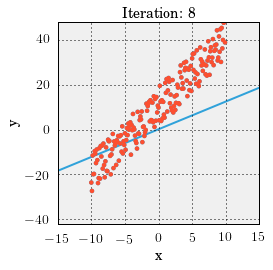
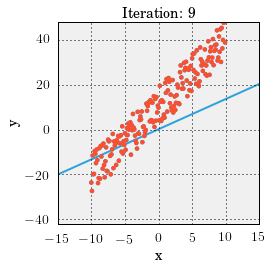
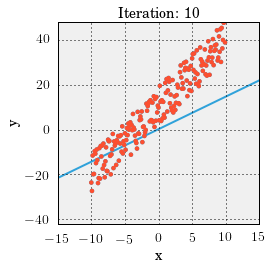
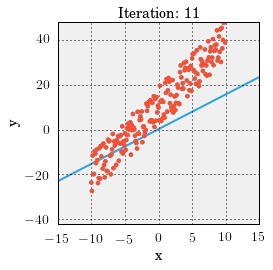
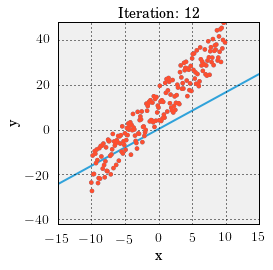
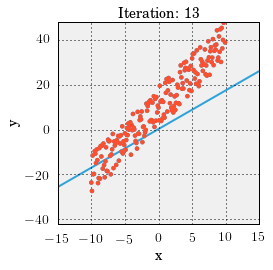
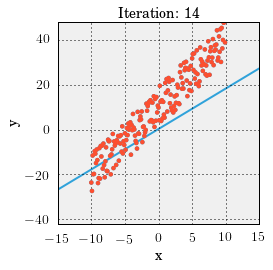
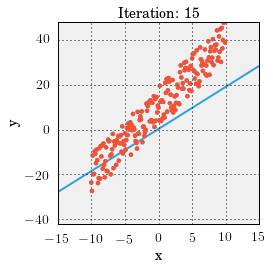
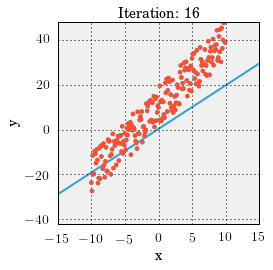
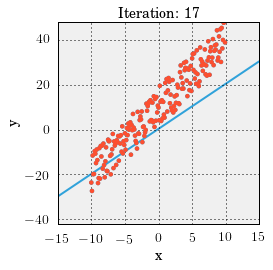
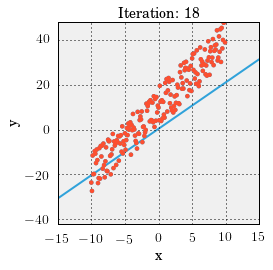
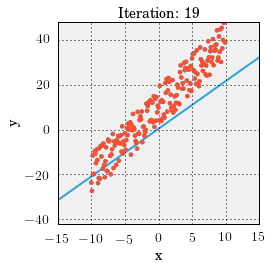
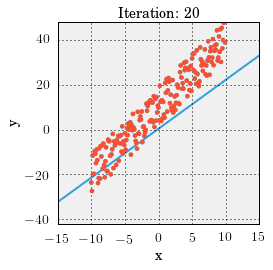
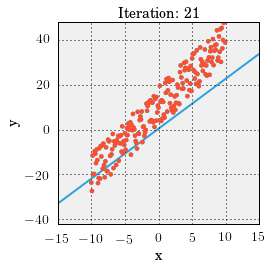
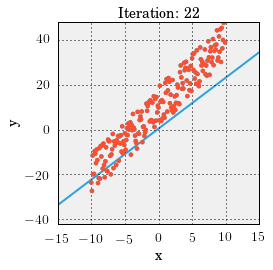
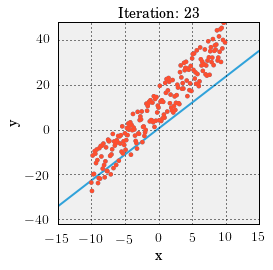
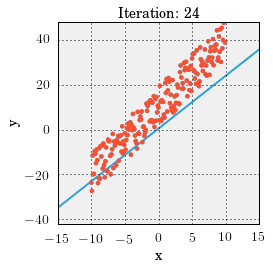
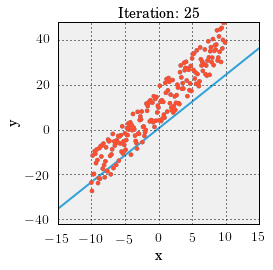
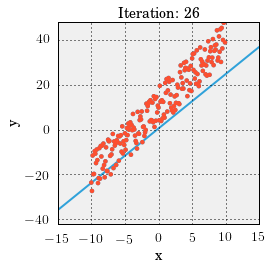
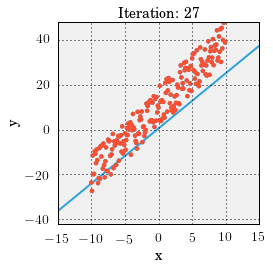
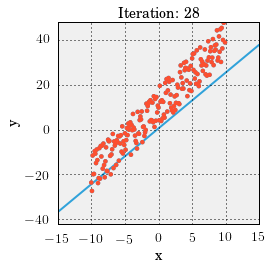
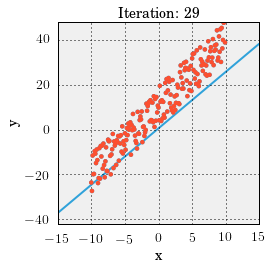
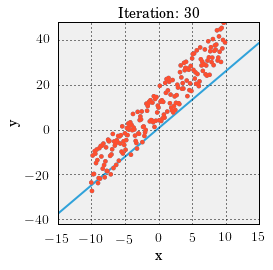
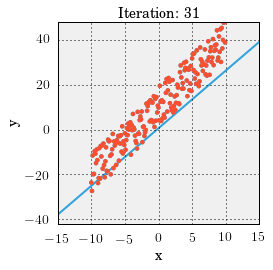
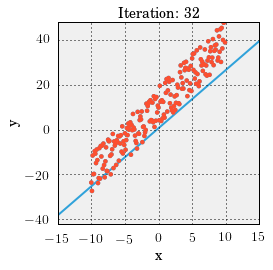
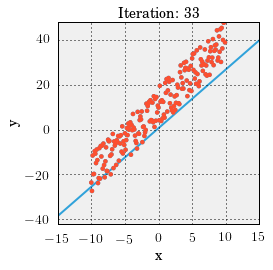
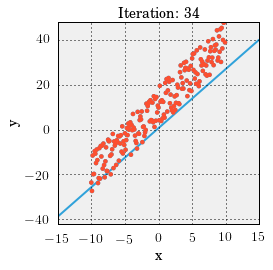
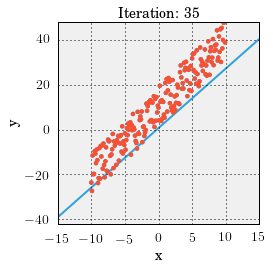
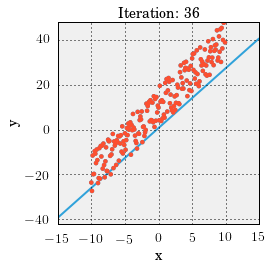
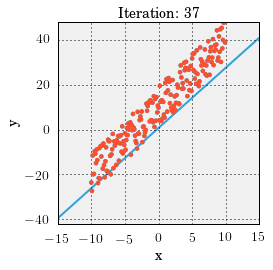
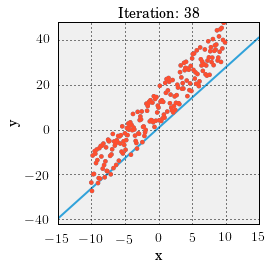
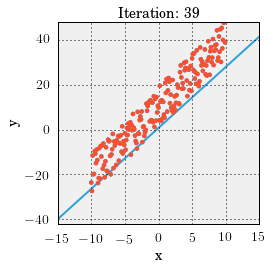
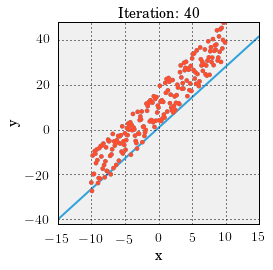
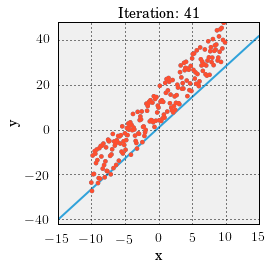
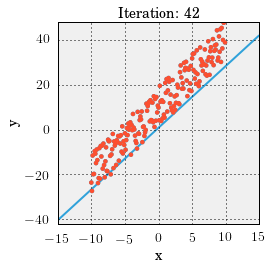
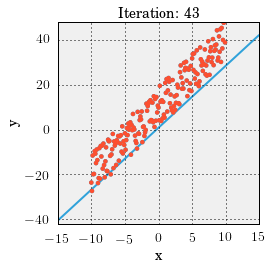
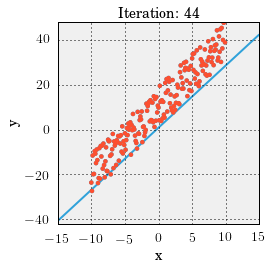
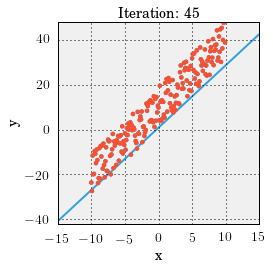
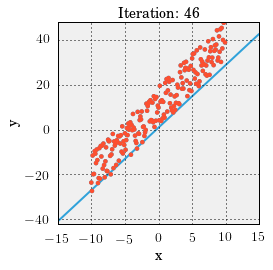
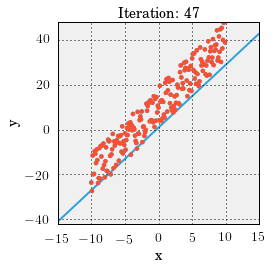
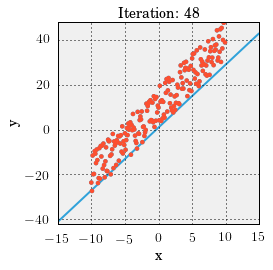
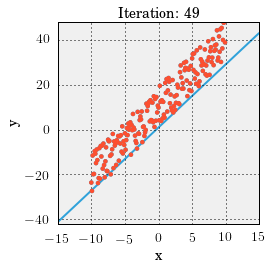
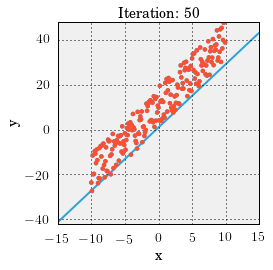
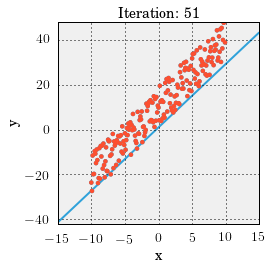
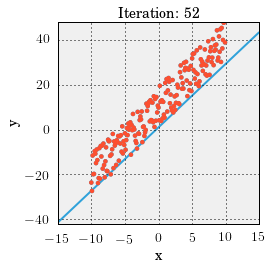
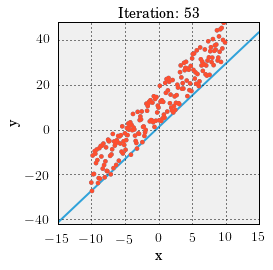
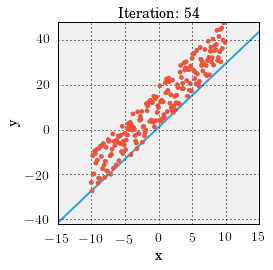
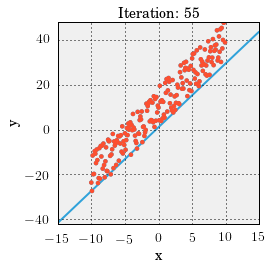
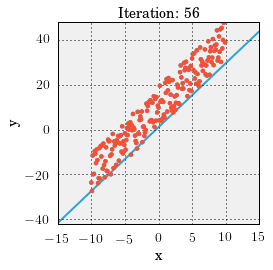
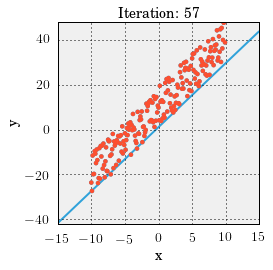
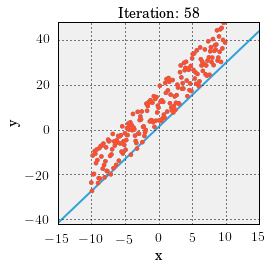
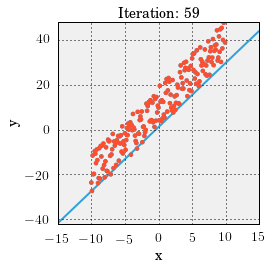
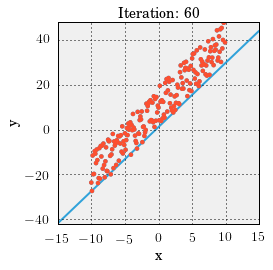
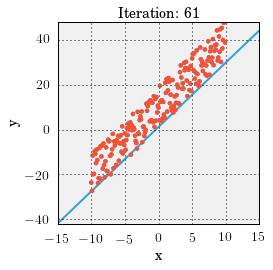
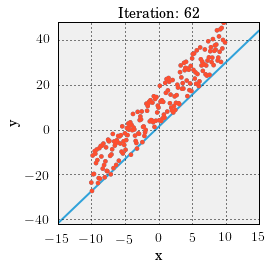
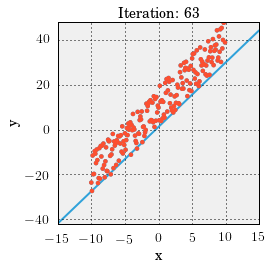
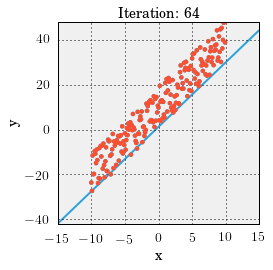
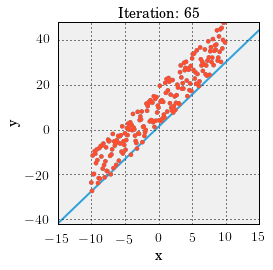
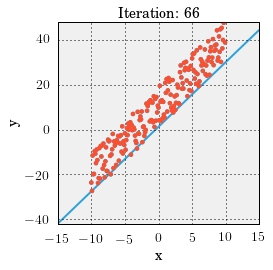
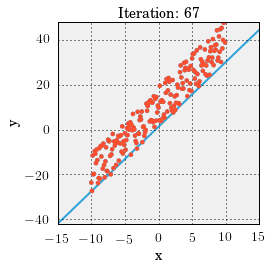
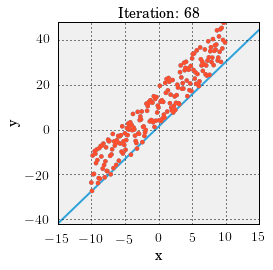
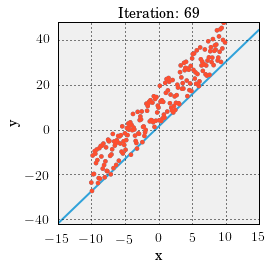
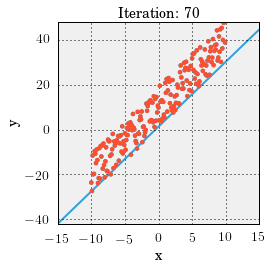
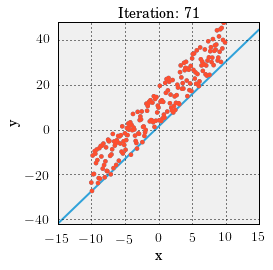
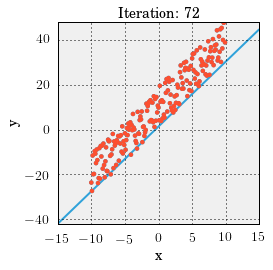
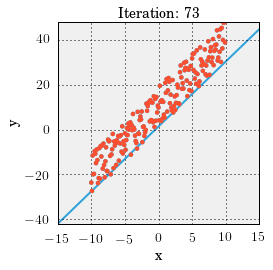
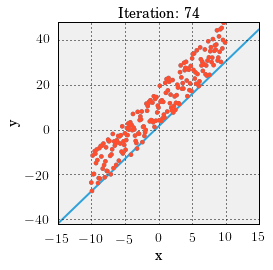
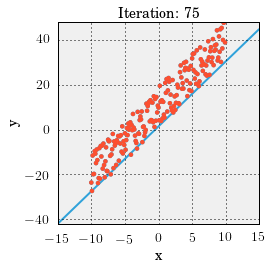
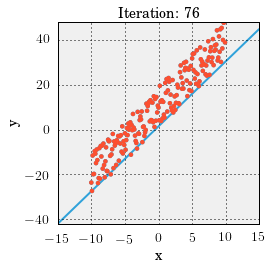
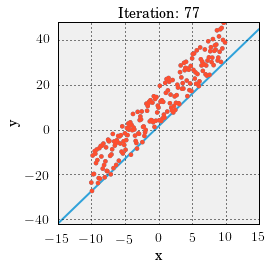
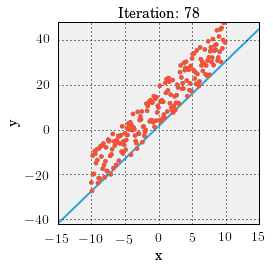
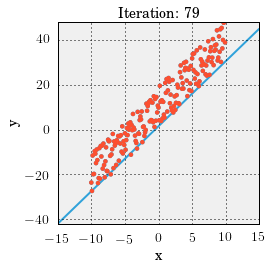
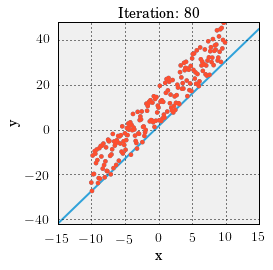
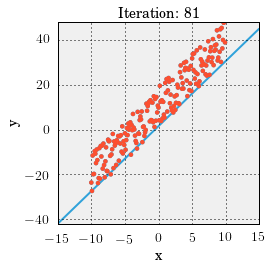
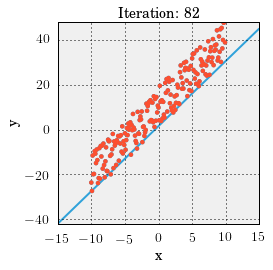
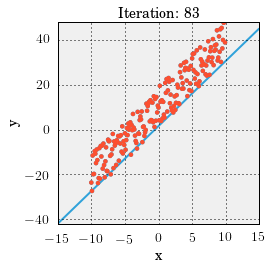
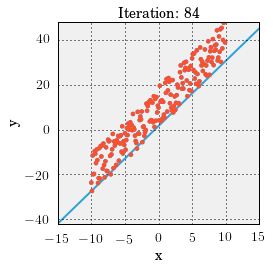
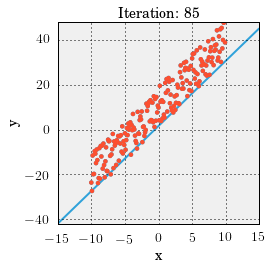
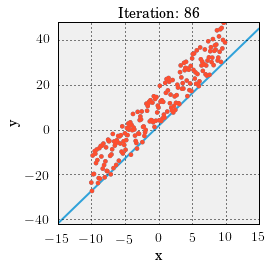
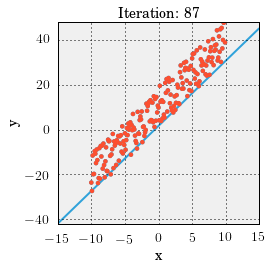
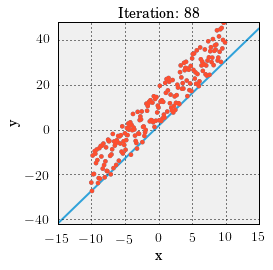
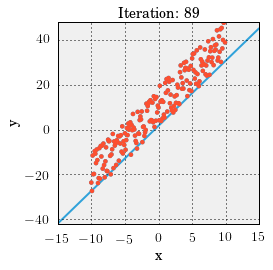
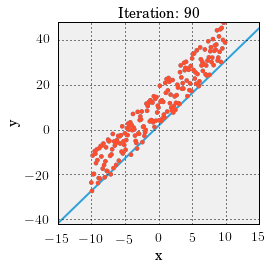
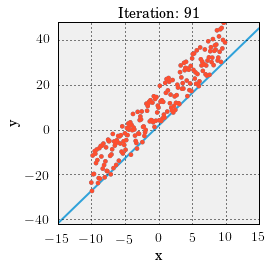
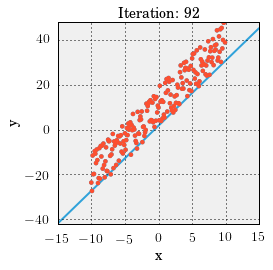
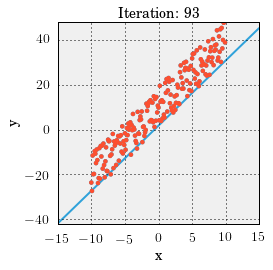
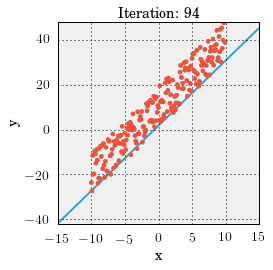
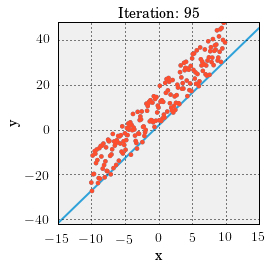
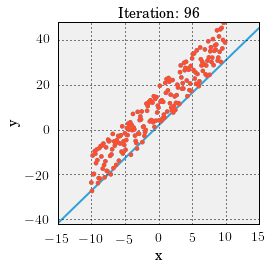
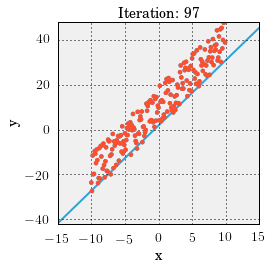
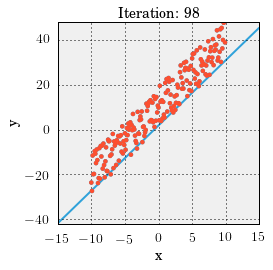
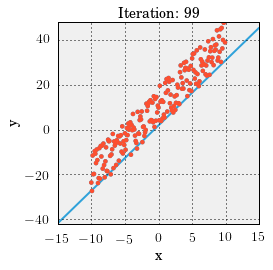

In [16]:
def sine(x, a, b):
    return a*x + b

i = np.arange(0,100)

dist = np.linspace(-15,15,202)   # Linear spatial sampling
x,y = np.meshgrid(dist, dist)
grid = (x**2+y**2)                 # 2D spatial sampling

dimensions = ['Iteration']
keys = [p for p in i]

items = [(k, hv.Curve(zip(dist, sine(dist, a_s[k], b_s[k])))*hv.Scatter((xs,ys))*hv.Scatter((xs,ys))) for k in keys]
sections = hv.HoloMap(items, kdims=dimensions)
sections

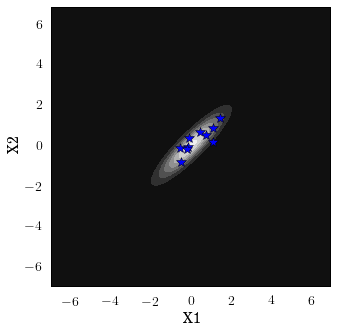

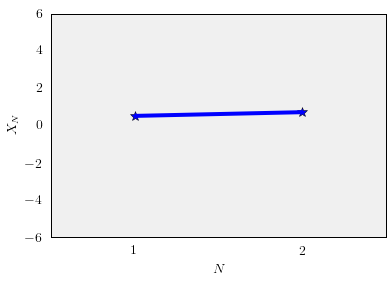

In [4]:
mu=np.array([[0],[0]])
cov=np.array([[1   , 0.9],
              [0.9 , 1  ]])
two_dimen_gaussian(mu,cov)
x, y = np.random.multivariate_normal([mu[0][0],mu[1][0]], cov, 10).T
plt.plot(x,y,'*',c='b',markersize=10)
#plt.savefig('../FinalReport/Pictures/Introduction/2dgaussian_one_sample.png', dpi=200,bbox_inches='tight')
plt.figure()
plt.xlim(0.5,2.5)
plt.ylim(-6,6)
plt.xticks([1,2])
plt.plot([1,2],[0.5,0.7],'*',c='b',markersize=10)
plt.plot([1,2],[0.5,0.7],c='b')
plt.ylabel('$X_{N}$')
plt.xlabel('$N$')
#plt.savefig('../FinalReport/Pictures/Introduction/2dgaussian_one_sample_al.png', dpi=200,bbox_inches='tight')